# EDA on Zomato Data Set

### Import All Important library

In [1]:
from math import remainder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterlab.semver import regexp

In [2]:
df = pd.read_csv(r"C:\Users\mikun\Downloads\archive\zomato.csv")
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [3]:
df.shape

(51717, 17)

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

### Checking if there is any duplicate values

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


## Converting rate column object to float

In [9]:
df["rate"] = df["rate"].replace("NEW", np.nan)

In [10]:
df["rate"] = df["rate"].str.replace("/5", "", regex=True)

In [11]:
df["rate"] = df["rate"].replace("-", np.nan)

In [12]:
df["rate"] = df["rate"].astype(float)

In [13]:
df["rate"] = df["rate"].fillna(df["rate"].median())

In [14]:
df["rate"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51717 entries, 0 to 51716
Series name: rate
Non-Null Count  Dtype  
--------------  -----  
51717 non-null  float64
dtypes: float64(1)
memory usage: 404.2 KB


## Checking Dataset

In [15]:
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         51717 non-null  float64
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  object 
 13  reviews_list    

In [17]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

## Converting `online_order` and `book_table` to binary (1=yes and 0=no)

In [18]:
df["online_order"].value_counts()

online_order
Yes    30444
No     21273
Name: count, dtype: int64

In [19]:
df["book_table"].value_counts()

book_table
No     45268
Yes     6449
Name: count, dtype: int64

In [20]:
df["online_order"] = df["online_order"].map({"Yes": 1, "No": 0})
df["book_table"] = df["book_table"].map({"Yes": 1, "No": 0})

## Checking the dataset

In [21]:
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  int64  
 4   book_table                   51717 non-null  int64  
 5   rate                         51717 non-null  float64
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  object 
 13  reviews_list    

In [23]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

### Dropping the phone column

In [24]:
df.drop("phone", axis=1, inplace=True)

## Again exploring the dataset

In [25]:
df.head(3)

,url,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  int64  
 4   book_table                   51717 non-null  int64  
 5   rate                         51717 non-null  float64
 6   votes                        51717 non-null  int64  
 7   location                     51696 non-null  object 
 8   rest_type                    51490 non-null  object 
 9   dish_liked                   23639 non-null  object 
 10  cuisines                     51672 non-null  object 
 11  approx_cost(for two people)  51371 non-null  object 
 12  reviews_list                 51717 non-null  object 
 13  menu_item       

In [27]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

# Handling `dish_liked` column

In [28]:
df["dish_liked"] = df["dish_liked"].fillna("Not available")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  int64  
 4   book_table                   51717 non-null  int64  
 5   rate                         51717 non-null  float64
 6   votes                        51717 non-null  int64  
 7   location                     51696 non-null  object 
 8   rest_type                    51490 non-null  object 
 9   dish_liked                   51717 non-null  object 
 10  cuisines                     51672 non-null  object 
 11  approx_cost(for two people)  51371 non-null  object 
 12  reviews_list                 51717 non-null  object 
 13  menu_item       

In [30]:
df.isna().sum()

url                              0
address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                      227
dish_liked                       0
cuisines                        45
approx_cost(for two people)    346
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [31]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


### Do something about location and listed_in(city)

In [32]:
df["location"].value_counts()

location
BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
Yelahanka                   6
West Bangalore              6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

In [33]:
df["listed_in(city)"].value_counts()

listed_in(city)
BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Residency Road           1620
Whitefield               1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: count, dtype: int64

In [34]:
len(df["listed_in(city)"].value_counts())

30

In [35]:
# dropping the location column
df.drop("location", axis=1, inplace=True)

## Again exploring dataset

In [36]:
df.head(1)

,url,address,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  int64  
 4   book_table                   51717 non-null  int64  
 5   rate                         51717 non-null  float64
 6   votes                        51717 non-null  int64  
 7   rest_type                    51490 non-null  object 
 8   dish_liked                   51717 non-null  object 
 9   cuisines                     51672 non-null  object 
 10  approx_cost(for two people)  51371 non-null  object 
 11  reviews_list                 51717 non-null  object 
 12  menu_item                    51717 non-null  object 
 13  listed_in(type) 

In [38]:
df.isna().sum()

url                              0
address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
rest_type                      227
dish_liked                       0
cuisines                        45
approx_cost(for two people)    346
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [39]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


### Exploring `rest_type` column missing values

In [40]:
df["rest_type"].isna().sum()

np.int64(227)

In [41]:
df["rest_type"].value_counts()

rest_type
Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Dessert Parlor, Food Court        2
Food Court, Beverage Shop         2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

In [42]:
# filling missing values with 'Unknown'
df["rest_type"] = df["rest_type"].fillna("Unknown")

### Again exploring dataset

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  int64  
 4   book_table                   51717 non-null  int64  
 5   rate                         51717 non-null  float64
 6   votes                        51717 non-null  int64  
 7   rest_type                    51717 non-null  object 
 8   dish_liked                   51717 non-null  object 
 9   cuisines                     51672 non-null  object 
 10  approx_cost(for two people)  51371 non-null  object 
 11  reviews_list                 51717 non-null  object 
 12  menu_item                    51717 non-null  object 
 13  listed_in(type) 

In [44]:
df.isna().sum()

url                              0
address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
rest_type                        0
dish_liked                       0
cuisines                        45
approx_cost(for two people)    346
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [45]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


### Exploring `cuisines` missing values

In [46]:
df['cuisines'].isna().sum()

np.int64(45)

In [47]:
df['cuisines'].value_counts()

cuisines
North Indian                                2913
North Indian, Chinese                       2385
South Indian                                1828
Biryani                                      918
Bakery, Desserts                             911
                                            ... 
French                                         1
South Indian, Biryani, Chettinad, Juices       1
North Indian, Street Food, Biryani             1
Chinese, Mughlai                               1
North Indian, Chinese, Arabian, Momos          1
Name: count, Length: 2723, dtype: int64

In [48]:
df['cuisines'] = df['cuisines'].fillna("Unknown")

### Exploring dataset

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  int64  
 4   book_table                   51717 non-null  int64  
 5   rate                         51717 non-null  float64
 6   votes                        51717 non-null  int64  
 7   rest_type                    51717 non-null  object 
 8   dish_liked                   51717 non-null  object 
 9   cuisines                     51717 non-null  object 
 10  approx_cost(for two people)  51371 non-null  object 
 11  reviews_list                 51717 non-null  object 
 12  menu_item                    51717 non-null  object 
 13  listed_in(type) 

In [50]:
df.isna().sum()

url                              0
address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
rest_type                        0
dish_liked                       0
cuisines                         0
approx_cost(for two people)    346
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [51]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


### Exploring `approx_cost(for two people)`

In [52]:
df['approx_cost(for two people)'].value_counts()

approx_cost(for two people)
300      7576
400      6562
500      4980
200      4857
600      3714
         ... 
469         1
60          1
560         1
3,700       1
5,000       1
Name: count, Length: 70, dtype: int64

In [53]:
# renaming the column as it is too big
df.rename(columns={'approx_cost(for two people)': 'cost_for_two'}, inplace=True)

In [54]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,cost_for_two,reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [55]:
df["cost_for_two"] = df["cost_for_two"].str.replace(",", "")

In [56]:
df["cost_for_two"].value_counts()

cost_for_two
300     7576
400     6562
500     4980
200     4857
600     3714
        ... 
469        1
60         1
560        1
3700       1
5000       1
Name: count, Length: 70, dtype: int64

In [57]:
df["cost_for_two"] = pd.to_numeric(df["cost_for_two"], errors="coerce")

In [58]:
df["cost_for_two"] = df["cost_for_two"].fillna(df["cost_for_two"].median())

### Again exploring the dataset

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              51717 non-null  object 
 1   address          51717 non-null  object 
 2   name             51717 non-null  object 
 3   online_order     51717 non-null  int64  
 4   book_table       51717 non-null  int64  
 5   rate             51717 non-null  float64
 6   votes            51717 non-null  int64  
 7   rest_type        51717 non-null  object 
 8   dish_liked       51717 non-null  object 
 9   cuisines         51717 non-null  object 
 10  cost_for_two     51717 non-null  float64
 11  reviews_list     51717 non-null  object 
 12  menu_item        51717 non-null  object 
 13  listed_in(type)  51717 non-null  object 
 14  listed_in(city)  51717 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 5.9+ MB


In [60]:
df.isna().sum()

url                0
address            0
name               0
online_order       0
book_table         0
rate               0
votes              0
rest_type          0
dish_liked         0
cuisines           0
cost_for_two       0
reviews_list       0
menu_item          0
listed_in(type)    0
listed_in(city)    0
dtype: int64

In [61]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,cost_for_two,reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


# Data Visualization

In [62]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'rest_type', 'dish_liked', 'cuisines', 'cost_for_two', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

## Univariate Analysis

### plot `online_order`

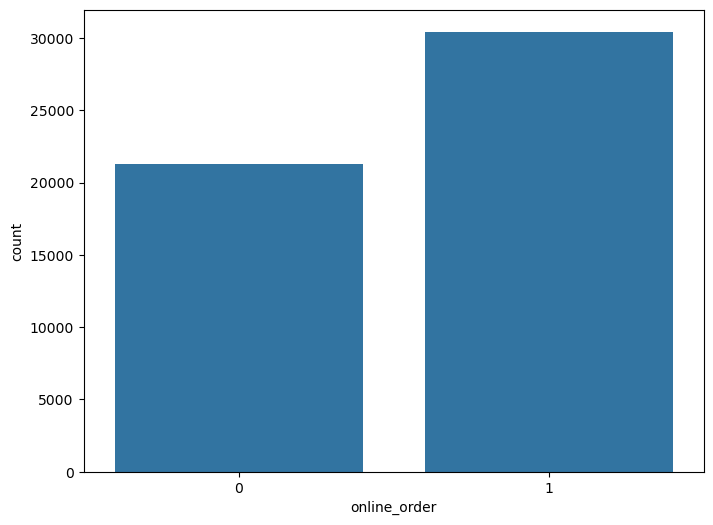

In [63]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(df, x="online_order")
plt.show()

### plotting `book_table`

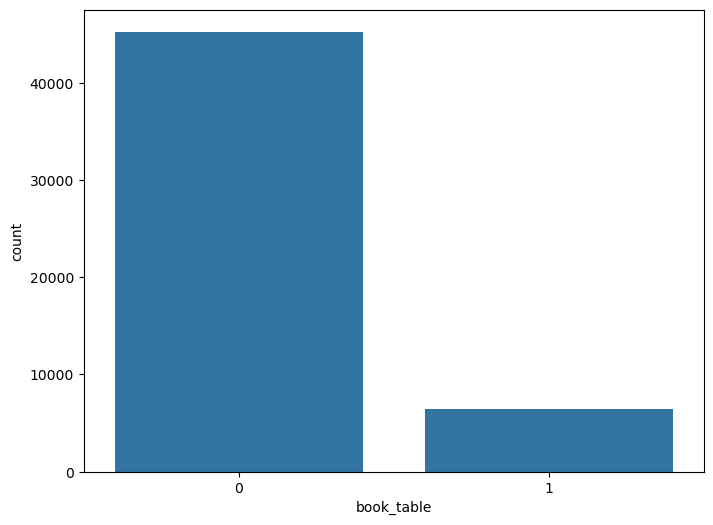

In [64]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(df, x="book_table")
plt.show()

In [65]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'rest_type', 'dish_liked', 'cuisines', 'cost_for_two', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### plotting `rate`

In [66]:
df["rate"].describe()

count    51717.000000
mean         3.700362
std          0.395391
min          1.800000
25%          3.500000
50%          3.700000
75%          3.900000
max          4.900000
Name: rate, dtype: float64

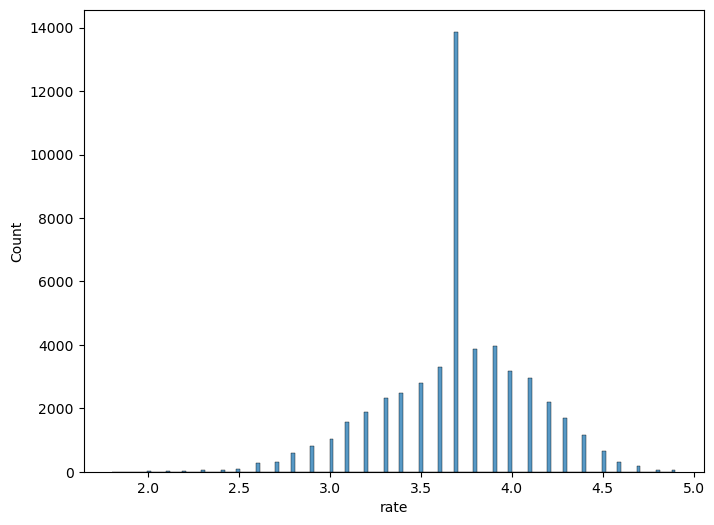

In [67]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.histplot(df["rate"])
plt.show()

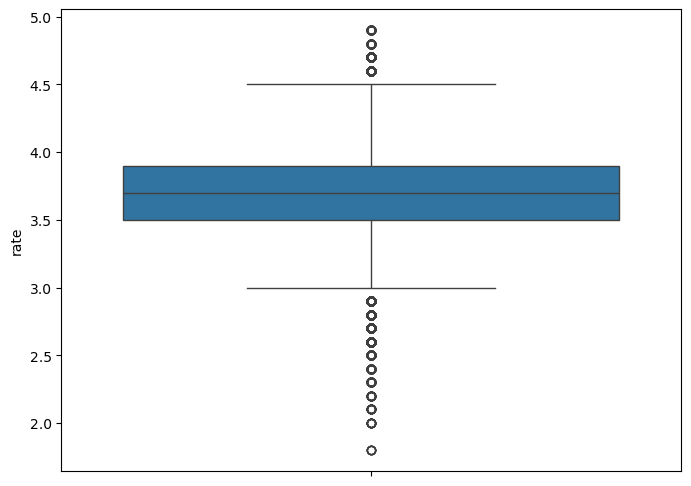

In [68]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(df["rate"])

### plotting `votes`

In [69]:
df["votes"].describe()

count    51717.000000
mean       283.697527
std        803.838853
min          0.000000
25%          7.000000
50%         41.000000
75%        198.000000
max      16832.000000
Name: votes, dtype: float64

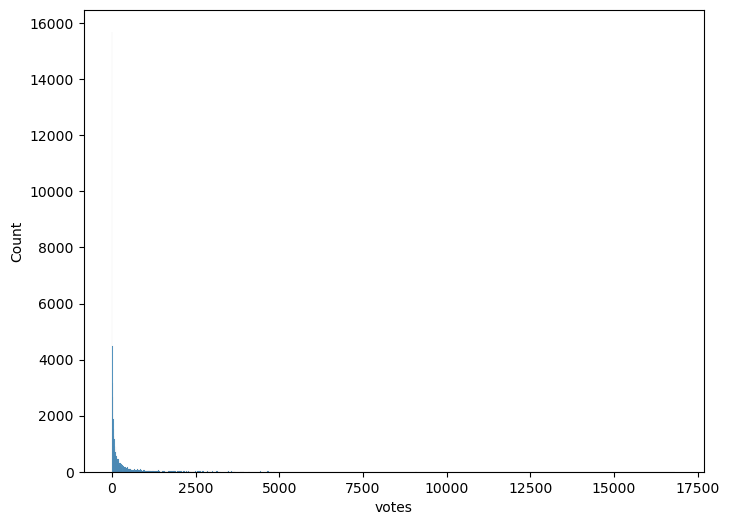

In [70]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.histplot(df["votes"])
plt.show()

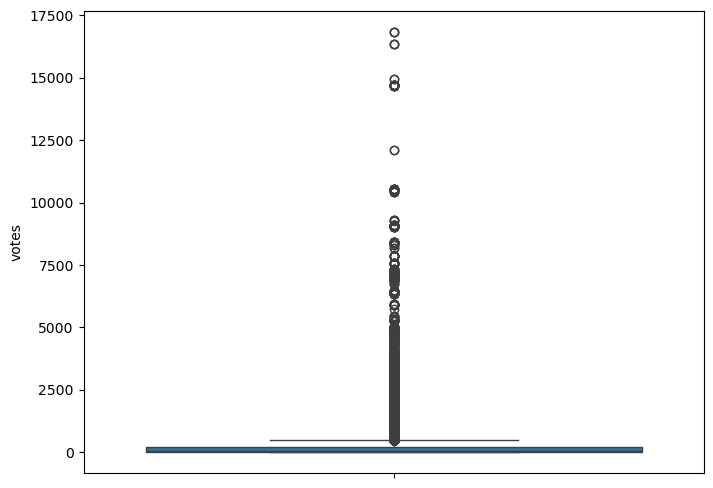

In [71]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(df["votes"])
plt.show()

In [72]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'rest_type', 'dish_liked', 'cuisines', 'cost_for_two', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### Plotting `rest_type`

In [73]:
df["rest_type"].value_counts().head(20)

rest_type
Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
Takeaway, Delivery             2037
Casual Dining, Bar             1154
Bakery                         1141
Beverage Shop                   867
Bar                             697
Food Court                      624
Sweet Shop                      468
Bar, Casual Dining              425
Lounge                          396
Pub                             357
Fine Dining                     346
Casual Dining, Cafe             319
Beverage Shop, Quick Bites      298
Bakery, Quick Bites             289
Mess                            267
Name: count, dtype: int64

In [74]:
len(df["rest_type"].value_counts())

94

In [75]:
restaurant_type = df["rest_type"].value_counts().head(20).reset_index(name="count")
restaurant_type

,rest_type,count
0,Quick Bites,19132
1,Casual Dining,10330
2,Cafe,3732
3,Delivery,2604
4,Dessert Parlor,2263
5,"Takeaway, Delivery",2037
6,"Casual Dining, Bar",1154
7,Bakery,1141
8,Beverage Shop,867
9,Bar,697


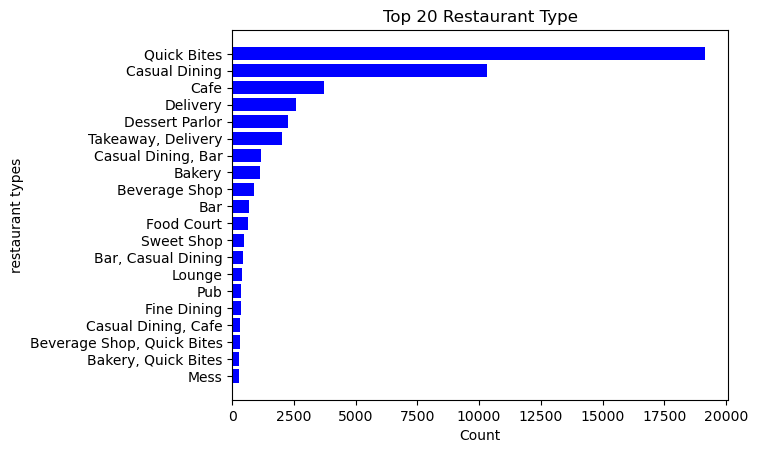

In [76]:
plt.barh(y=restaurant_type["rest_type"], width=restaurant_type["count"], color="blue")
plt.gca().invert_yaxis()
plt.xlabel("Count")
plt.ylabel("restaurant types")
plt.title("Top 20 Restaurant Type")
plt.show()

In [77]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'rest_type', 'dish_liked', 'cuisines', 'cost_for_two', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### plotting `dish_liked`

In [78]:
df["dish_liked"]

0        Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1        Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
2        Churros, Cannelloni, Minestrone Soup, Hot Choc...
3                                              Masala Dosa
4                                      Panipuri, Gol Gappe
                               ...                        
51712                                        Not available
51713                                        Not available
51714                                        Not available
51715                         Cocktails, Pizza, Buttermilk
51716                                        Not available
Name: dish_liked, Length: 51717, dtype: object

In [79]:
df["dish_liked"].value_counts()

dish_liked
Not available                                                                                   28078
Biryani                                                                                           182
Chicken Biryani                                                                                    73
Friendly Staff                                                                                     69
Waffles                                                                                            68
                                                                                                ...  
Salads, Chicken Curry, Pasta, Lime Soda Sweet, Lunch Buffet, Cheesecake, Rara Meat                  1
Pizza, Chaat, Mocktails, Salads, Sunday Brunch, Omelette, Breakfast Buffet                          1
Roti, Breakfast Buffet, Coffee, Lamb, Salads, Pancakes, Rasmalai                                    1
Lobster, Papaya Salad, Pad Thai, Jasmine Rice, Hakka Noodles, Jasmine T

In [80]:
(df['dish_liked'] != 'Not available').astype(int)

0        1
1        1
2        1
3        1
4        1
        ..
51712    0
51713    0
51714    0
51715    1
51716    0
Name: dish_liked, Length: 51717, dtype: int64

We created a dish available or not in a restaurant and then created a plot showing
* Available = 0
* Not Available = 1

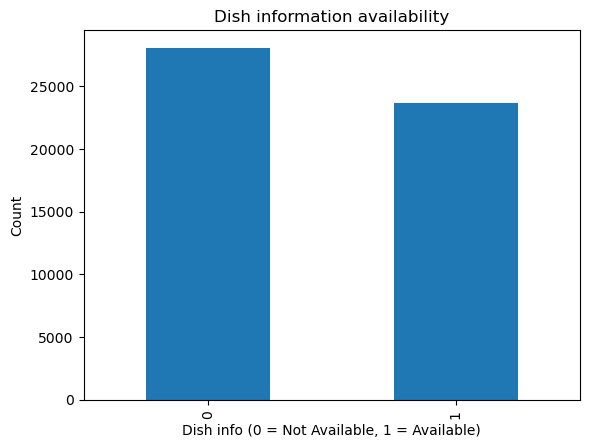

In [81]:
# Feature Engineering
df['dish_available'] = (df['dish_liked'] != 'Not available').astype(int)

df['dish_available'].value_counts().plot(
    kind='bar',
    title='Dish information availability',
    xlabel='Dish info (0 = Not Available, 1 = Available)',
    ylabel='Count'
);

Most of the Dish info is Not Available

In [82]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'rest_type', 'dish_liked', 'cuisines', 'cost_for_two', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)', 'dish_available'],
      dtype='object')

In [83]:
from collections import Counter
dishes = df['dish_liked'].str.split(', ')


In [84]:
all_dishes = [dish for sublist in dishes for dish in sublist]

top_dishes = Counter(all_dishes).most_common(10)

In [85]:
top_dishes

[('Not available', 28078),
 ('Pasta', 3409),
 ('Burgers', 3024),
 ('Cocktails', 2832),
 ('Pizza', 2737),
 ('Biryani', 2092),
 ('Coffee', 1994),
 ('Mocktails', 1887),
 ('Sandwiches', 1676),
 ('Paratha', 1566)]

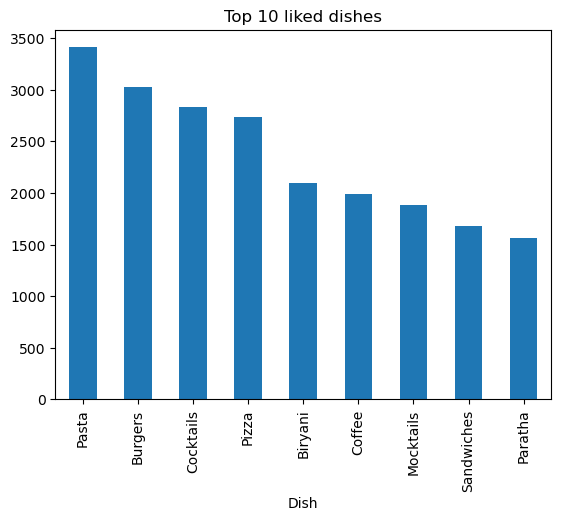

In [86]:
top_dishes_df = pd.DataFrame(top_dishes[1:], columns=['Dish', 'Count'])
top_dishes_df.plot(
    x='Dish',
    y='Count',
    kind='bar',
    title='Top 10 liked dishes',
    legend=False
);

Most liked dish is Pasta

In [87]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'rest_type', 'dish_liked', 'cuisines', 'cost_for_two', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)', 'dish_available'],
      dtype='object')

### Plotting `cuisines`

In [88]:
df["cuisines"]

0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51717, dtype: object

In [89]:
df["cuisines"].value_counts()

cuisines
North Indian                                2913
North Indian, Chinese                       2385
South Indian                                1828
Biryani                                      918
Bakery, Desserts                             911
                                            ... 
South Indian, Biryani, Chettinad, Juices       1
Tibetan, Nepalese                              1
North Indian, Street Food, Biryani             1
Chinese, Mughlai                               1
North Indian, Chinese, Arabian, Momos          1
Name: count, Length: 2724, dtype: int64

In [90]:
cuisines_type = df["cuisines"].str.split(", ")
cuisines_type

0                [North Indian, Mughlai, Chinese]
1                   [Chinese, North Indian, Thai]
2                        [Cafe, Mexican, Italian]
3                    [South Indian, North Indian]
4                      [North Indian, Rajasthani]
                           ...                   
51712                               [Continental]
51713                               [Finger Food]
51714                               [Finger Food]
51715                               [Finger Food]
51716    [Finger Food, North Indian, Continental]
Name: cuisines, Length: 51717, dtype: object

In [91]:
all_cuisines = [cuisine for sublist in cuisines_type for cuisine in sublist]
all_cuisines

['North Indian',
 'Mughlai',
 'Chinese',
 'Chinese',
 'North Indian',
 'Thai',
 'Cafe',
 'Mexican',
 'Italian',
 'South Indian',
 'North Indian',
 'North Indian',
 'Rajasthani',
 'North Indian',
 'North Indian',
 'South Indian',
 'Andhra',
 'Chinese',
 'Pizza',
 'Cafe',
 'Italian',
 'Cafe',
 'Italian',
 'Continental',
 'Cafe',
 'Mexican',
 'Italian',
 'Momos',
 'Beverages',
 'Cafe',
 'Cafe',
 'Italian',
 'Continental',
 'Cafe',
 'Chinese',
 'Continental',
 'Italian',
 'Cafe',
 'Continental',
 'Cafe',
 'Mexican',
 'Italian',
 'Cafe',
 'Cafe',
 'Fast Food',
 'Continental',
 'Chinese',
 'Momos',
 'Chinese',
 'Cafe',
 'Italian',
 'Cafe',
 'Italian',
 'American',
 'Cafe',
 'Chinese',
 'Continental',
 'Italian',
 'Cafe',
 'French',
 'North Indian',
 'Cafe',
 'Pizza',
 'Fast Food',
 'Beverages',
 'Cafe',
 'Fast Food',
 'Italian',
 'Fast Food',
 'Cafe',
 'European',
 'Cafe',
 'Cafe',
 'Bakery',
 'Cafe',
 'South Indian',
 'Cafe',
 'Fast Food',
 'Beverages',
 'Cafe',
 'Fast Food',
 'North Indian

In [92]:
len(all_cuisines)

126864

In [93]:
top_cuisines = Counter(all_cuisines).most_common(10)
top_cuisines

[('North Indian', 21085),
 ('Chinese', 15547),
 ('South Indian', 8644),
 ('Fast Food', 8096),
 ('Biryani', 6492),
 ('Continental', 5765),
 ('Desserts', 5633),
 ('Cafe', 5303),
 ('Beverages', 4747),
 ('Italian', 3389)]

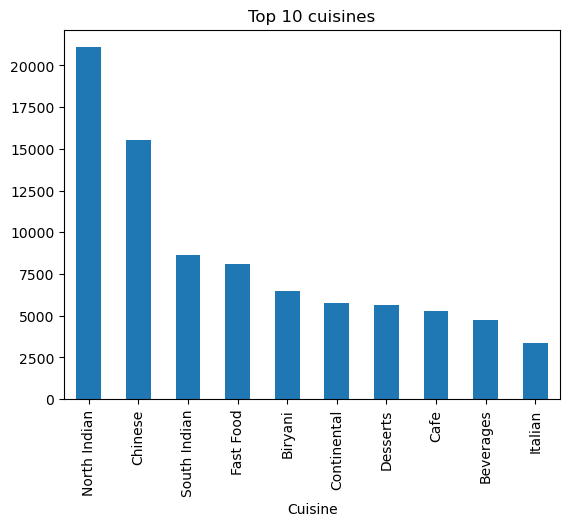

In [94]:
top_cuisines_df = pd.DataFrame(top_cuisines, columns=['Cuisine', 'Count'])

top_cuisines_df.plot(
    x="Cuisine",
    y='Count',
    kind='bar',
    title='Top 10 cuisines',
    legend=False
);

Most Popular Cuisine is North Indian

In [95]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'rest_type', 'dish_liked', 'cuisines', 'cost_for_two', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)', 'dish_available'],
      dtype='object')

### plotting `cost_for_two`

In [96]:
df['cost_for_two'].describe()

count    51717.000000
mean       554.391689
std        437.563723
min         40.000000
25%        300.000000
50%        400.000000
75%        650.000000
max       6000.000000
Name: cost_for_two, dtype: float64

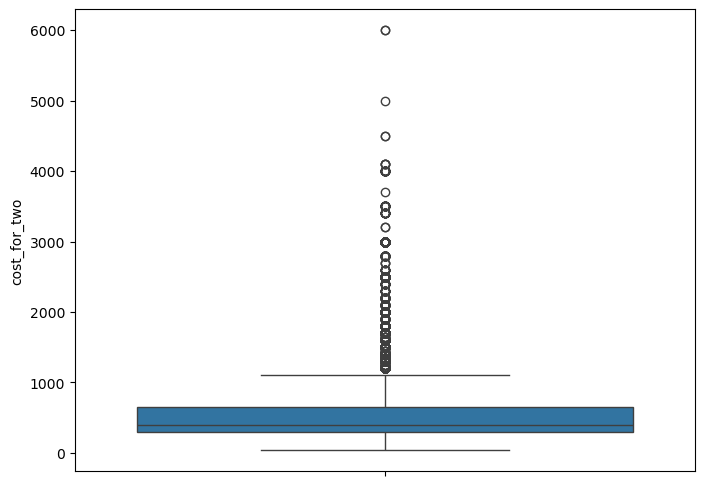

In [97]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(df["cost_for_two"])
plt.show()

In [98]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'rest_type', 'dish_liked', 'cuisines', 'cost_for_two', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)', 'dish_available'],
      dtype='object')

Average cost for two people is 554

### plotting `listed_in(type)`

In [99]:
df["listed_in(type)"]

0               Buffet
1               Buffet
2               Buffet
3               Buffet
4               Buffet
             ...      
51712    Pubs and bars
51713    Pubs and bars
51714    Pubs and bars
51715    Pubs and bars
51716    Pubs and bars
Name: listed_in(type), Length: 51717, dtype: object

In [100]:
df["listed_in(type)"].value_counts()

listed_in(type)
Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: count, dtype: int64

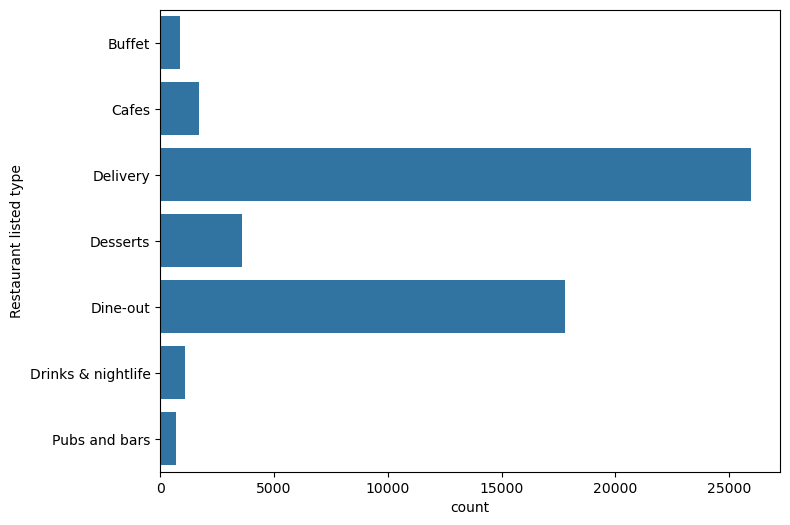

In [101]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(df["listed_in(type)"])
plt.ylabel("Restaurant listed type")
plt.show()

Most popular type is Delivery Restaurant

In [102]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'rest_type', 'dish_liked', 'cuisines', 'cost_for_two', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)', 'dish_available'],
      dtype='object')

### Analysis using `listed_in(city)`

In [103]:
df["listed_in(city)"]

0        Banashankari
1        Banashankari
2        Banashankari
3        Banashankari
4        Banashankari
             ...     
51712      Whitefield
51713      Whitefield
51714      Whitefield
51715      Whitefield
51716      Whitefield
Name: listed_in(city), Length: 51717, dtype: object

In [104]:
df["listed_in(city)"].value_counts()

listed_in(city)
BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Residency Road           1620
Whitefield               1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: count, dtype: int64

In [105]:
len(df["listed_in(city)"].value_counts())

30

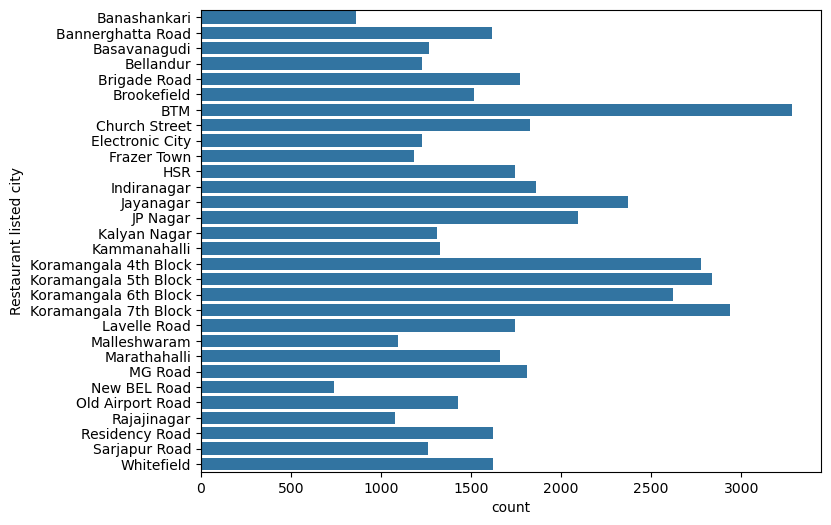

In [106]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(df["listed_in(city)"])
plt.ylabel("Restaurant listed city")
plt.show()

BTM layout has the most restaurant

In [107]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'rest_type', 'dish_liked', 'cuisines', 'cost_for_two', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)', 'dish_available'],
      dtype='object')

# Bivariate Analysis

### Analysis between `listed_in(city)` and `rate`

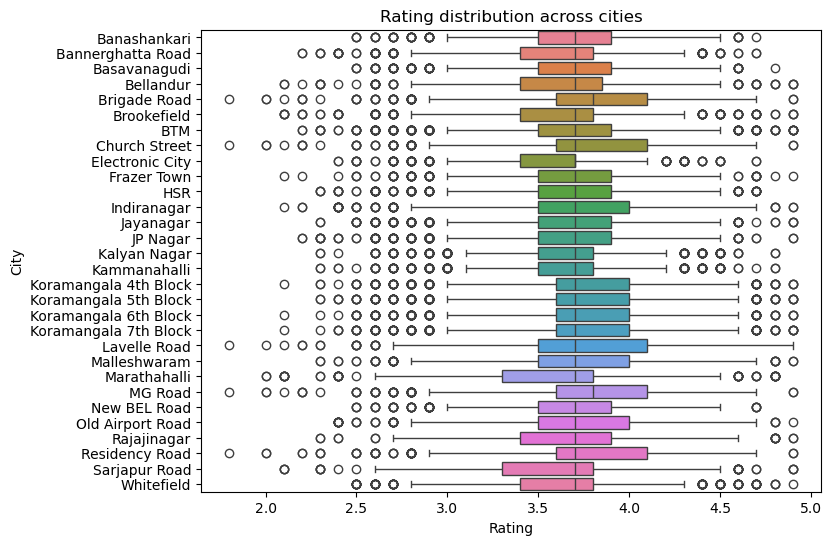

In [108]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(y=df["listed_in(city)"], x=df["rate"], hue=df["listed_in(city)"])
plt.title('Rating distribution across cities')
# plt.yticks(rotation=30)
plt.xlabel('Rating')
plt.ylabel('City')
plt.show()

Brigade Road and MG Road has the most highest rating

## Analysis between `rest_type` and `rate`

In [109]:
top_types = df["rest_type"].value_counts().head(10).index
top_types

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Delivery', 'Dessert Parlor',
       'Takeaway, Delivery', 'Casual Dining, Bar', 'Bakery', 'Beverage Shop',
       'Bar'],
      dtype='object', name='rest_type')

In [110]:
filter_df = df[df["rest_type"].isin(top_types)]

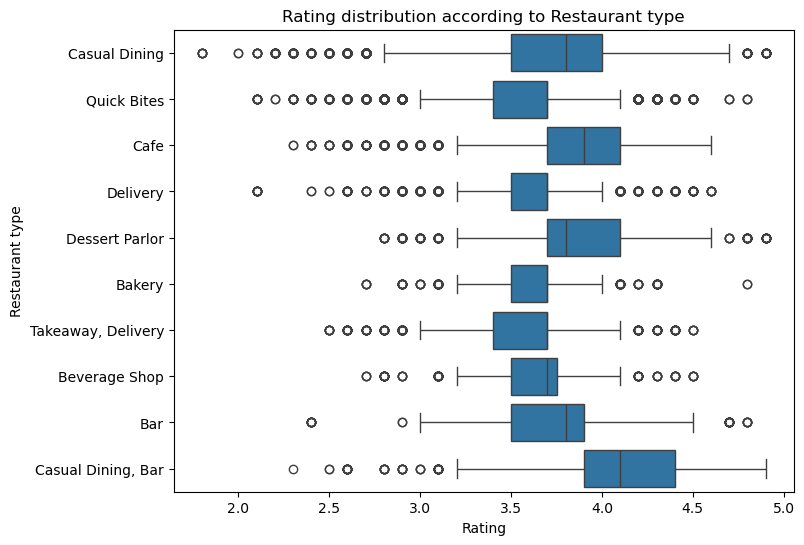

In [111]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(x="rate", y="rest_type", data=filter_df)
# plt.xticks(rotation=30)
plt.title("Rating distribution according to Restaurant type")
plt.xlabel("Rating")
plt.ylabel("Restaurant type")
plt.show()

`Casual Dining, Bar` has the highest average rating

In [112]:
df.head()

,url,address,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,cost_for_two,reviews_list,menu_item,listed_in(type),listed_in(city),dish_available
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,1
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,1


In [113]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'rest_type', 'dish_liked', 'cuisines', 'cost_for_two', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)', 'dish_available'],
      dtype='object')

### Split the table into X and y

In [114]:
X = df[["cost_for_two", "online_order", "book_table", "votes",
        "listed_in(city)", "listed_in(type)",
        "rest_type", "cuisines",
        "dish_available"
       ]]
X.head()

,cost_for_two,online_order,book_table,votes,listed_in(city),listed_in(type),rest_type,cuisines,dish_available
0,800.0,1,1,775,Banashankari,Buffet,Casual Dining,"North Indian, Mughlai, Chinese",1
1,800.0,1,0,787,Banashankari,Buffet,Casual Dining,"Chinese, North Indian, Thai",1
2,800.0,1,0,918,Banashankari,Buffet,"Cafe, Casual Dining","Cafe, Mexican, Italian",1
3,300.0,0,0,88,Banashankari,Buffet,Quick Bites,"South Indian, North Indian",1
4,600.0,0,0,166,Banashankari,Buffet,Casual Dining,"North Indian, Rajasthani",1


In [115]:
y = df["rate"]
y.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [116]:
X_encoded = pd.get_dummies(data=X, columns=["listed_in(city)", "listed_in(type)",
                                            "rest_type", "cuisines"],
                           drop_first=True
                          )

In [117]:
X_encoded.head()

,cost_for_two,online_order,book_table,votes,dish_available,listed_in(city)_Banashankari,listed_in(city)_Bannerghatta Road,listed_in(city)_Basavanagudi,listed_in(city)_Bellandur,listed_in(city)_Brigade Road,...,"cuisines_Turkish, Arabian, Fast Food, Salad, Healthy Food, Desserts","cuisines_Turkish, Chinese","cuisines_Turkish, Desserts","cuisines_Turkish, Fast Food","cuisines_Turkish, Fast Food, Biryani, Chinese","cuisines_Turkish, Rolls",cuisines_Unknown,cuisines_Vietnamese,"cuisines_Vietnamese, Salad","cuisines_Vietnamese, Thai, Burmese, Japanese"
0,800.0,1,1,775,1,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,800.0,1,0,787,1,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,800.0,1,0,918,1,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,300.0,0,0,88,1,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,600.0,0,0,166,1,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [118]:
len(X_encoded.columns)

2856

too much columns let's reduce it

### For `cuisines`

In [119]:
top_cuisines = X["cuisines"].value_counts().head(15).index
top_cuisines

Index(['North Indian', 'North Indian, Chinese', 'South Indian', 'Biryani',
       'Bakery, Desserts', 'Fast Food', 'Desserts', 'Cafe',
       'South Indian, North Indian, Chinese', 'Bakery', 'Chinese',
       'Ice Cream, Desserts', 'Chinese, North Indian', 'Mithai, Street Food',
       'Desserts, Ice Cream'],
      dtype='object', name='cuisines')

In [120]:
X["cuisines"] = X["cuisines"].where(
    X["cuisines"].isin(top_cuisines),
    "Other"
)

C:\Users\mikun\AppData\Local\Temp\ipykernel_22236\4018388047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cuisines"] = X["cuisines"].where(


### For `rest_type`

In [121]:
X["rest_type"].value_counts().head(10)

rest_type
Quick Bites           19132
Casual Dining         10330
Cafe                   3732
Delivery               2604
Dessert Parlor         2263
Takeaway, Delivery     2037
Casual Dining, Bar     1154
Bakery                 1141
Beverage Shop           867
Bar                     697
Name: count, dtype: int64

In [122]:
top_rest_types = X["rest_type"].value_counts().head(10).index

In [123]:
X["rest_type"] = X["rest_type"].where(
    X["rest_type"].isin(top_rest_types),
    "Other"
)

C:\Users\mikun\AppData\Local\Temp\ipykernel_22236\4068736238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["rest_type"] = X["rest_type"].where(


### For `listed_in(city)`

In [124]:
X["listed_in(city)"].value_counts()

listed_in(city)
BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Residency Road           1620
Whitefield               1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: count, dtype: int64

In [125]:
top_cities = X["listed_in(city)"].value_counts().head(10).index

In [126]:
X["listed_in(city)"] = X["listed_in(city)"].where(
    X["listed_in(city)"].isin(top_cities),
    "Other"
)

C:\Users\mikun\AppData\Local\Temp\ipykernel_22236\3656298092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["listed_in(city)"] = X["listed_in(city)"].where(


In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
num_features = [
    "cost_for_two",
    "online_order",
    "book_table",
    "votes",
    "dish_available"
]

cat_features = [
    "listed_in(city)",
    "listed_in(type)",
    "rest_type",
    "cuisines"
]


In [160]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", "passthrough", num_features)
    ]
)

In [162]:
pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])


In [163]:
pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['listed_in(city)',
                                                   'listed_in(type)',
                                                   'rest_type', 'cuisines']),
                                                 ('num', 'passthrough',
                                                  ['cost_for_two',
                                                   'online_order', 'book_table',
                                                   'votes',
                                                   'dish_available'])])),
                ('model',
                 RandomForestRegressor(n_estimators=200, n_jobs=-1,
                                       random_state=42))])

In [164]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['listed_in(city)',
                                                   'listed_in(type)',
                                                   'rest_type', 'cuisines']),
                                                 ('num', 'passthrough',
                                                  ['cost_for_two',
                                                   'online_order', 'book_table',
                                                   'votes',
                                                   'dish_available'])])),
                ('model',
                 RandomForestRegressor(n_estimators=200, n_jobs=-1,
                                       random_state=42))])

In [165]:
y_pred = pipeline.predict(X_test)
y_pred = np.clip(y_pred, 0, 5)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

MAE: 0.08431083901784499
RMSE: 0.1655208090196961
R2: 0.8244012265014309


In [166]:
import joblib
joblib.dump(pipeline, "zomato_pipeline.pkl")

['zomato_pipeline.pkl']

In [168]:
import sklearn
print(sklearn.__version__)

1.6.1


## ***Everytying below not good for training***

Now again apply the dummies

In [127]:
X_encoded = pd.get_dummies(X,
                           drop_first=True
                          )

In [128]:
X_encoded.head()

,cost_for_two,online_order,book_table,votes,dish_available,listed_in(city)_Church Street,listed_in(city)_Indiranagar,listed_in(city)_JP Nagar,listed_in(city)_Jayanagar,listed_in(city)_Koramangala 4th Block,...,cuisines_Desserts,"cuisines_Desserts, Ice Cream",cuisines_Fast Food,"cuisines_Ice Cream, Desserts","cuisines_Mithai, Street Food",cuisines_North Indian,"cuisines_North Indian, Chinese",cuisines_Other,cuisines_South Indian,"cuisines_South Indian, North Indian, Chinese"
0,800.0,1,1,775,1,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,800.0,1,0,787,1,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,800.0,1,0,918,1,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,300.0,0,0,88,1,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,600.0,0,0,166,1,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


### Splitting the Train and Test set

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, # that X set that have been converted with dummy variable (frequency encoding)
    y,
    test_size=0.2,
    random_state=42
)

In [130]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(41373, 46) (10344, 46)
(41373,) (10344,)


## Let's train a model usinng all this

In [131]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 
from sklearn.pipeline import Pipeline

In [132]:
models = {
    # ----------Linear models---------------
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5),

    #-----------Tree-based models -----------
    "Random Forest": RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ),
    "Gradient Boost": GradientBoostingRegressor(
        random_state=42
    ),

    #-----------Support Vector Regression-----
    "SVR": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVR(kernel="rbf", C=10, epsilon=0.1))
    ]),
    # ----- XGBoost -----
    "XGBoost": xgb.XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        random_state=42
    ),

    # ----- Polynomial Regression -----
    "Poly Ridge": Pipeline([
        ("scaler", StandardScaler()),
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("model", Ridge(alpha=1.0))
    ])
}

In [134]:
results = []

for name, model in models.items():
    try:
        #Train
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Clip prediciton to valid rating range
        y_pred = y_pred.clip(0, 5)

        # Metrics
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        results.append({
            "Model": name,
            "MAE": mae,
            "RMSE": rmse,
            "R2": r2
        })
    except Exception as e:
        print(f"{name} failed: {e}")

In [135]:
results

[{'Model': 'Linear Regression',
  'MAE': 0.23327571764659286,
  'RMSE': np.float64(0.3126679481912444),
  'R2': 0.37341065603904544},
 {'Model': 'Ridge Regression',
  'MAE': 0.23327251270201024,
  'RMSE': np.float64(0.3126661515732063),
  'R2': 0.37341785689535356},
 {'Model': 'Lasso Regression',
  'MAE': 0.2395588144080566,
  'RMSE': np.float64(0.32307626833206754),
  'R2': 0.33099957551469605},
 {'Model': 'ElasticNet',
  'MAE': 0.2359131409717717,
  'RMSE': np.float64(0.3174438796738508),
  'R2': 0.35412244288032035},
 {'Model': 'Random Forest',
  'MAE': 0.0832535921579246,
  'RMSE': np.float64(0.16460861633771626),
  'R2': 0.8263313588842588},
 {'Model': 'Gradient Boost',
  'MAE': 0.1815135758795907,
  'RMSE': np.float64(0.2774490158651069),
  'R2': 0.5066187342912072},
 {'Model': 'SVR',
  'MAE': 0.21391932660443488,
  'RMSE': np.float64(0.3045012507644642),
  'R2': 0.4057154508182029},
 {'Model': 'XGBoost',
  'MAE': 0.16161219274822541,
  'RMSE': np.float64(0.24841896854858525),
  

In [137]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [140]:
y_pred = rf.predict(X_test)

y_pred = y_pred.clip(0, 5)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2: {r2}")

Mean Absolute Error: 0.08313487950342292
Root Mean Squared Error: 0.16386296145836748
R^2: 0.8279011864038185


In [141]:
y_train_pred = rf.predict(X_train).clip(0, 5)
y_test_pred  = rf.predict(X_test).clip(0, 5)

print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE :", mean_absolute_error(y_test, y_test_pred))

Train MAE: 0.03623870417588547
Test MAE : 0.08313487950342292


## RandomizedSearchCV

In [142]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [200, 300, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

rf_search = RandomizedSearchCV(
    rf,
    param_distributions=param_grid,
    n_iter=20,
    scoring="neg_mean_absolute_error",
    cv=3,
    random_state=42,
    n_jobs=-1
)

rf_search.fit(X_train, y_train)

best_rf = rf_search.best_estimator_


In [143]:
best_rf

RandomForestRegressor(max_depth=30, max_features='log2', n_estimators=300,
                      n_jobs=-1, random_state=42)

In [144]:
best_rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=30,
    max_features='log2',
    n_jobs=-1,
    random_state=42
)

best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, max_features='log2', n_estimators=300,
                      n_jobs=-1, random_state=42)

In [145]:
y_train_pred = best_rf.predict(X_train).clip(0, 5)
y_test_pred  = best_rf.predict(X_test).clip(0, 5)

print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE :", mean_absolute_error(y_test, y_test_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Test R2  :", r2_score(y_test, y_test_pred))

Train MAE: 0.07200557298950112
Test MAE : 0.14783710333867298
Test RMSE: 0.23605738083001884
Test R2  : 0.6428493493558236


In [146]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2: {r2}")

Mean Absolute Error: 0.08313487950342292
Root Mean Squared Error: 0.16386296145836748
R^2: 0.8279011864038185


***Although I performed hyperparameter tuning, the tuned model showed worse generalization. This indicated that the baseline Random Forest was already optimal, so I selected it as the final model.***

In [154]:
rf = RandomForestRegressor(random_state=42, n_estimators=200)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [155]:
y_pred = rf.predict(X_test)

y_pred = y_pred.clip(0, 5)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2: {r2}")

Mean Absolute Error: 0.0832535921579246
Root Mean Squared Error: 0.16460861633771626
R^2: 0.8263313588842588


In [156]:
import joblib

joblib.dump(rf, "Zomato_rating_rf.pkl")

['Zomato_rating_rf.pkl']